# Лабораторная работа №3. Синтез БИХ-фильтров




## Модуль 1. Метод размещения нулей и полюсов.


### Задача 1.1 Синтез цифрового резонатора

| Варианты: |   $1$ |    $2$ |    $3$ |    $4$ |    $5$ |    $6$ |     $7$ |    $8$ |    $9$ |    $10$ | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $\nu_0$  | $0.25$ | $0.2$ | $0.1$ |  $—$ | $—$ | $—$ | $0.3$ | $0.15$ | $0.35$ | $0.4$ |
|$\theta_0$ | $—$ | $—$ | $—$ | $\dfrac\pi6$ | $\dfrac\pi3$ | $\dfrac\pi2$ |  $—$ | $—$ | $—$ | $—$ |

Синтезировать методом размещения нулей и полюсов цифровой резонатор для частоты $\nu_0$ или $\theta_0$ (в зависимости от варианта). Параметр, влияющий на добротность резонатора, подобрать самостоятельно.

* Построить нуль-полюсную диаграмму получившегося фильтра.
* Записать передаточную функцию $H(z)$.
* Вычислить аналитически импульсную и переходную характеристики и сравнить с результатами моделирования.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.

### Вариант 1

In [5]:
from scipy import signal
import numpy as np
from matplotlib import pyplot as plt

In [11]:
nu_0 = 0.25

beta, alpha = signal.iirpeak(nu_0, Q=5, fs=1)
dlti_rs = signal.dlti(beta, alpha, dt=1)
w, H = signal.dfreqresp(dlti_rs, w = 2 * np.pi * np.linspace(-0.5, 0.5, 1024))

#### Нуль-полюсная диаграмма

[5.28601195e-17+0.85237464j 5.28601195e-17-0.85237464j]


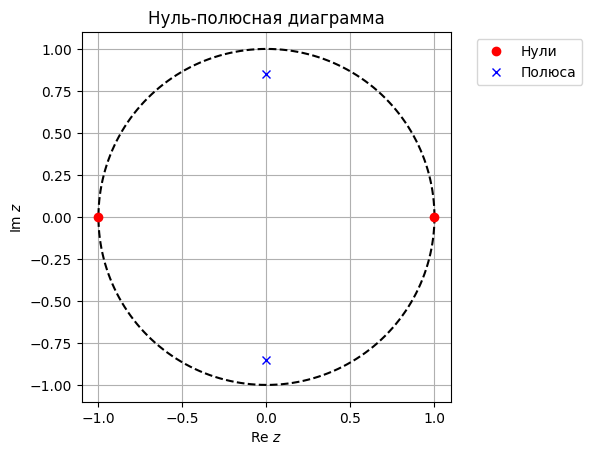

In [12]:
q = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(q), np.sin(q), 'k--')  
z, p, k = signal.tf2zpk(beta, alpha)
print(p)
plt.plot(z.real, z.imag, 'ro', label='Нули')
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re $z$")
plt.ylabel("Im $z$")
plt.show()

#### Передаточная функция H(z)

$$H(z)=\frac{z^2 - 1}{(z - 0.85j) (z + 0.85j)}$$

#### Импульсная и переходная характеристики

In [14]:
N=50
x=np.zeros(N)
x[0] = 1
y = signal.lfilter(b=beta, a=alpha, x=x)
y

array([ 1.36728736e-01,  1.44549947e-17, -2.36067977e-01, -3.54593314e-17,
        1.71513425e-01,  4.38951526e-17, -1.24611797e-01, -4.50656841e-17,
        9.05357704e-02,  4.23135994e-17, -6.57780875e-02, -3.76967046e-17,
        4.77905780e-02,  3.24406904e-17, -3.47218873e-02, -2.72403474e-17,
        2.52269278e-02,  2.24582677e-17, -1.83284359e-02, -1.82545732e-17,
        1.33163882e-02,  1.46705355e-17, -9.67492231e-03, -1.16816031e-17,
        7.02924251e-03,  9.23031462e-18, -5.10704363e-03, -7.24613399e-18,
        3.71048439e-03,  5.65689780e-18, -2.69582471e-03, -4.39498006e-18,
        1.95863130e-03,  3.40020689e-18, -1.42302893e-03, -2.62083787e-18,
        1.03389104e-03,  2.01345338e-18, -7.51165809e-04, -1.54227294e-18,
        5.45753906e-04,  1.17822411e-18, -3.96513423e-04, -8.97949419e-19,
        2.88083864e-04,  6.82854736e-19, -2.09305179e-04, -5.18250800e-19,
        1.52069114e-04,  3.92608029e-19])

#### Исследование фильтра на устойчивость по входу

Фильтр является устойчивым, так как его полюса лежат внутри окружности $$H(z) < 1$$

### АЧХ, ФЧХ фильтра

In [15]:
system = signal.dlti(z, p, k, dt=1)
w, H = signal.dfreqresp(system, w=np.linspace(-np.pi, np.pi, 1024))

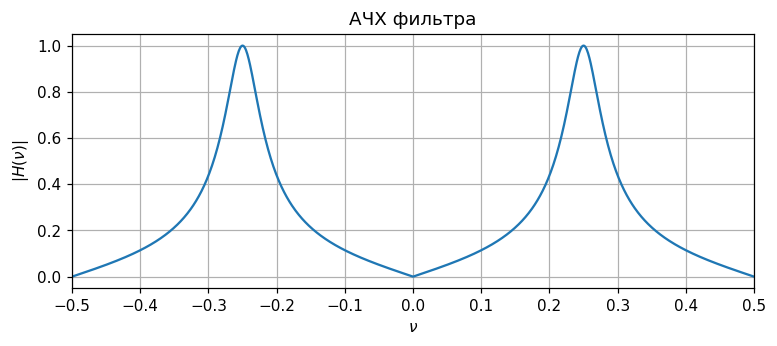

In [16]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(w/(2*np.pi), abs(H))
plt.xlabel("$\\nu$")
plt.ylabel("$|H(\\nu)|$")
plt.title("АЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.grid()
plt.show()

In [17]:
w, H =signal.dfreqresp(system, w=[2*np.pi/6])
np.angle(H)

array([1.30305321])

In [18]:
theta=np.linspace(-np.pi, np.pi, 1024)
theta, H =signal.dfreqresp(system, w=theta)

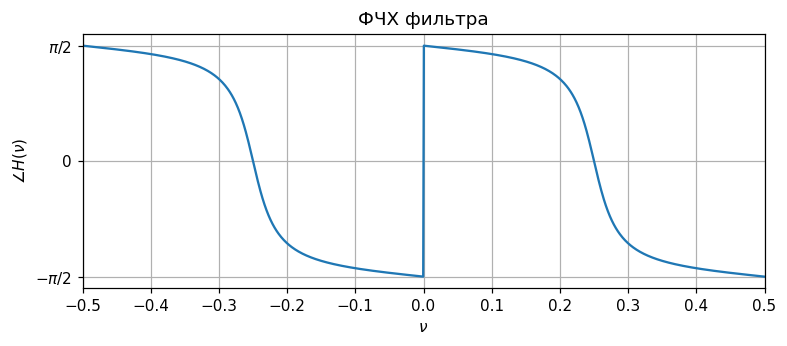

In [19]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), np.angle(H))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

### Задача 1.2 Синтез цифрового фильтра Hum removal

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |   10 |  
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_0$, Гц  | 250 | 350 | 400 |  200 | 100 | 150 | 250 | 500| 600 | 350 |
|  $f_д$, Гц | 1000 | 1000 | 1000 | 500 | 500 | 500 | 1000 | 2000 | 2000 | 2000 |

Синтезировать методом размещения нулей и полюсов цифровой фильтр Hum removal  для частоты $f_{0}$, $f_{д}$. Параметр, влияющий на добротность, подобрать самостоятельно.

* Записать передаточную функцию $H(z)$.
* Исследовать фильтр на устойчивость по входу.
* Изобразить блок-схему фильтра.
* Построить АЧХ и ФЧХ фильтра.
* Сравнить АЧХ с $H(z)$.


In [23]:
# Вариант 1
f_0 = 250
f_d = 1000

theta_0 = 2 * np.pi * f_0 / f_d
A = 0.9

#### Передаточная функция H(z)

$$H(z)={{G}_{0}}\frac{\left( 1-\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}{\left( 1-A\exp (j{{\theta }_{0}}){{z}^{-1}} \right)\left( 1-A\exp (-j{{\theta }_{0}}){{z}^{-1}} \right)}$$

#### Исследование на устойчивость по входу

In [29]:
z=np.array([np.exp(1j*theta_0), np.exp(-1j*theta_0)])
p=np.array([A*np.exp(1j*theta_0), A*np.exp(-1j*theta_0)])
k=1

Hum_removal=signal.dlti(z,p,k, dt=1)

w, H = signal.dfreqresp(Hum_removal, w=2*np.pi*np.linspace(-0.5, 0.5, 1024))
Hum_removal

ZerosPolesGainDiscrete(
array([6.123234e-17+1.j, 6.123234e-17-1.j]),
array([5.5109106e-17+0.9j, 5.5109106e-17-0.9j]),
1,
dt: 1
)

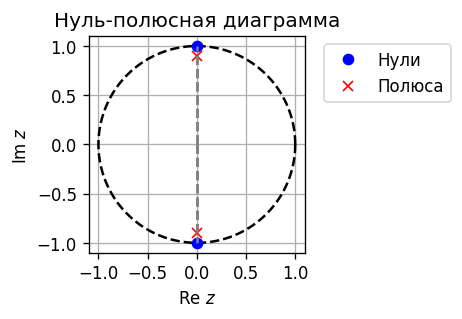

In [26]:
plt.figure(figsize=[4, 4], dpi=120)
# unit circle
t = np.linspace(0, 2*np.pi, 401)
plt.plot(np.cos(t), np.sin(t), 'k--')  

plt.plot(z.real, z.imag, 'bo', label='Нули')
plt.plot(p.real, p.imag, 'rx', label='Полюса')

for u in z:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

for u in p:
    plt.plot([0, u.real], [0, u.imag],  '--', color='gray')

plt.yticks(np.linspace(-1, 1, 5))
plt.xticks(np.linspace(-1, 1, 5))

plt.grid()
plt.axis('image')
plt.axis([-1.1, 1.1, -1.1, 1.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")

plt.xlabel("Re $z$")
plt.ylabel("Im $z$")

plt.tight_layout()
# plt.savefig("hum_removal_zpk.svg")

Устойчив, так как полюса лежат внутри единичной окружности $H(z) < 1$

### АЧХ, ФЧХ фильтра

In [33]:
system = signal.dlti(z, p, k, dt=1)
w, H = signal.dfreqresp(system, w=np.linspace(-np.pi, np.pi, 1024))

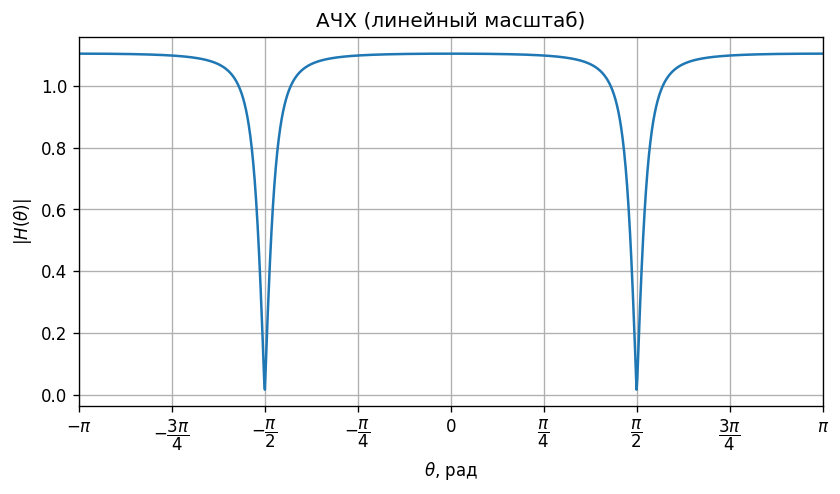

In [34]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(w, abs(H))
plt.xlabel("$\\theta$, рад")
plt.ylabel("$|H(\\theta)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-np.pi, np.pi])
plt.xticks([-np.pi, np.pi])

str1=["$-\\pi$",
     "$-\dfrac{3\\pi}{4}$",
     "$-\dfrac{\\pi}{2}$",
     "$-\dfrac{\\pi}{4}$",
     "$0$",
     "$\dfrac{\\pi}{4}$",
     "$\dfrac{\\pi}{2}$",
     "$\dfrac{3\\pi}{4}$",
     "$\\pi$"]
plt.xticks(2*np.pi*np.linspace(-0.5, 0.5, 9), labels=str1)
plt.grid()

In [35]:
theta=np.linspace(-np.pi, np.pi, 1024)
theta, H =signal.dfreqresp(system, w=theta)

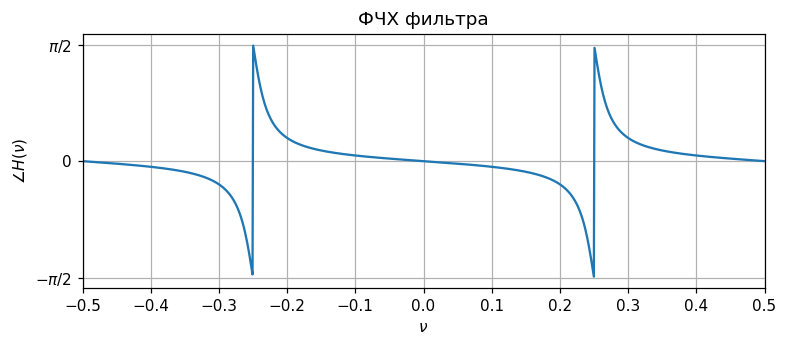

In [36]:
plt.figure(figsize=[8, 3], dpi=110)
plt.plot(theta/(2*np.pi), np.angle(H))
plt.xlabel("$\\nu$")
plt.ylabel("$\\angle H(\\nu)$")
plt.title("ФЧХ фильтра")
plt.xlim([-0.5, 0.5])
plt.xticks(np.linspace(-0.5, 0.5, 11))
plt.yticks([-np.pi/2, 0, np.pi/2], labels=("$-\\pi/2$", "0", "$\\pi/2$"))

plt.grid()
plt.show()

## Модуль 2. Метод билинейного *z*-преобразования

### Задача 2.1 Синтез фильтра нижних частот (ФНЧ)

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|  $f_д$, Гц  | 6000 | 6200 | 6400 |  6600 | 6800 | 7000 | 6200 | 6400 |  6600 | 6800 |
|  $f_1$, Гц | 800 | 860 | 920 | 980 | 1040 | 1100 | 860 | 920 | 980 | 1040 |
|  $f_2$, Гц | 1100 | 1170 | 1240 | 1310 | 1380 | 1450 |1170 | 1240 | 1310 | 1380 |
|  $a_\max$, дБ | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 | 0.4455 |0.4455 | 0.4455 | 0.4455 | 0.4455 |
|  $a_\min$, дБ | 40 | 40 | 40 | 40 | 40 | 40 |40 | 40 | 40 | 40 |

 Получить коэффициенты разностного уравнения БИХ-фильтра нижних частот со следующими характеристиками:
* частота дискретизации $f_{д}$, 
* граничная частота полосы пропускания $f_1$,
* граничная частота полосы задерживания $f_2$,
* максимальное допустимое затухание в полосе пропускания $a_\max$,
* минимальное допустимое затухание в полосе задерживания $a_\min$.

Воспользоваться методом билинейного z-преобразования для фильтров: 

1) Баттервота,

2) Чебышёва 1 рода,

3) Чебышёва 2 рода,

4) Золотарёва—Кауэра.

Из четырех получившихся результатов выбрать фильтр, обладающий наименьшим порядком $N$ и построить схему его реализации в виде каскада биквадратных блоков. Для биквадратных блоков выбрать прямую каноническую реализацию. 


#### Вариант 1

In [9]:
fs = 6000
wp = 800
ws = 1100
gpass = 0.4455
gstop = 40

Синтез на основе фильтра Баттерворта

In [10]:
N, Wn = signal.buttord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.butter(N, Wn=Wn, btype='lowpass', analog=False, output='ba', fs=fs)
N, Wn, beta, alpha 

(16,
 850.494390744091,
 array([6.25053171e-08, 1.00008507e-06, 7.50063805e-06, 3.50029776e-05,
        1.13759677e-04, 2.73023225e-04, 5.00542579e-04, 7.15060827e-04,
        8.04443431e-04, 7.15060827e-04, 5.00542579e-04, 2.73023225e-04,
        1.13759677e-04, 3.50029776e-05, 7.50063805e-06, 1.00008507e-06,
        6.25053171e-08]),
 array([ 1.00000000e+00, -6.92008270e+00,  2.38603433e+01, -5.36539015e+01,
         8.73549548e+01, -1.08577510e+02,  1.06133147e+02, -8.29556054e+01,
         5.22620560e+01, -2.65699109e+01,  1.08451140e+01, -3.51128012e+00,
         8.82838809e-01, -1.66448536e-01,  2.21702026e-02, -1.86220901e-03,
         7.42510028e-05]))

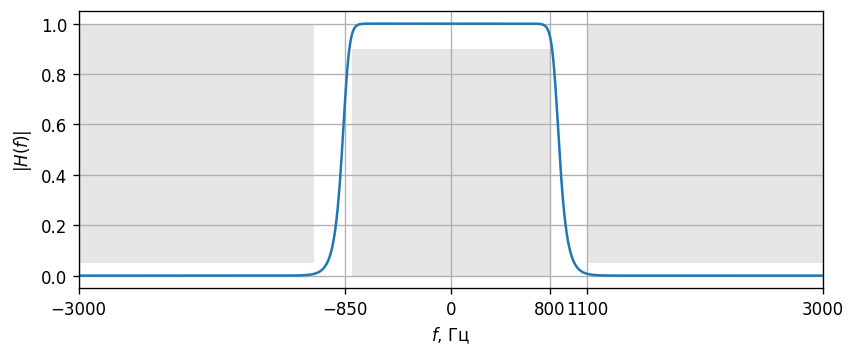

In [11]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

plt.grid()

In [14]:
signal.tf2sos(beta, alpha)

array([[ 7.25630385e-05,  1.46105064e-04,  7.35461184e-05,
         1.00000000e+00, -7.89156655e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.00309452e+00,  1.00314983e+00,
         1.00000000e+00, -1.50178716e+00,  6.63885451e-01],
       [ 1.00000000e+00,  1.99070689e+00,  9.90760752e-01,
         1.00000000e+00, -1.34935785e+00,  7.70749437e-01],
       [ 1.00000000e+00,  9.92707048e-01,  0.00000000e+00,
         1.00000000e+00, -1.27149070e+00,  9.16403836e-01]])

Синтез на основе фильтра Чебышева 1 рода

In [12]:
N, Wn = signal.cheb1ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby1(N=N, rp=gpass, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

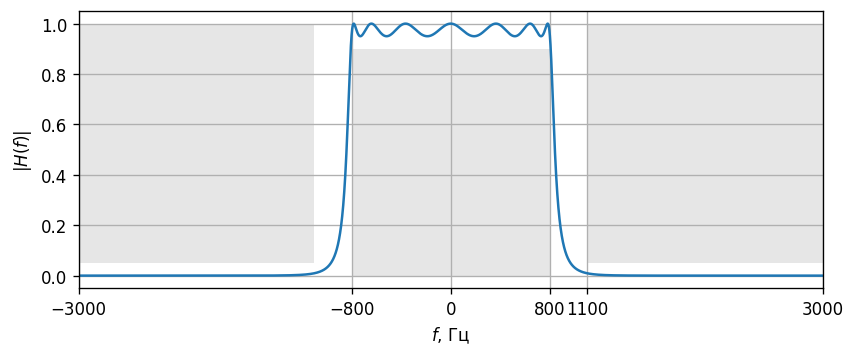

In [13]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

In [15]:
signal.tf2sos(beta, alpha)

array([[ 7.25630385e-05,  1.46105064e-04,  7.35461184e-05,
         1.00000000e+00, -7.89156655e-01,  0.00000000e+00],
       [ 1.00000000e+00,  2.00309452e+00,  1.00314983e+00,
         1.00000000e+00, -1.50178716e+00,  6.63885451e-01],
       [ 1.00000000e+00,  1.99070689e+00,  9.90760752e-01,
         1.00000000e+00, -1.34935785e+00,  7.70749437e-01],
       [ 1.00000000e+00,  9.92707048e-01,  0.00000000e+00,
         1.00000000e+00, -1.27149070e+00,  9.16403836e-01]])

Синтез на основе фильтра Чебышева 2 рода

In [16]:
N, Wn = signal.cheb2ord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha= signal.cheby2(N=N, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

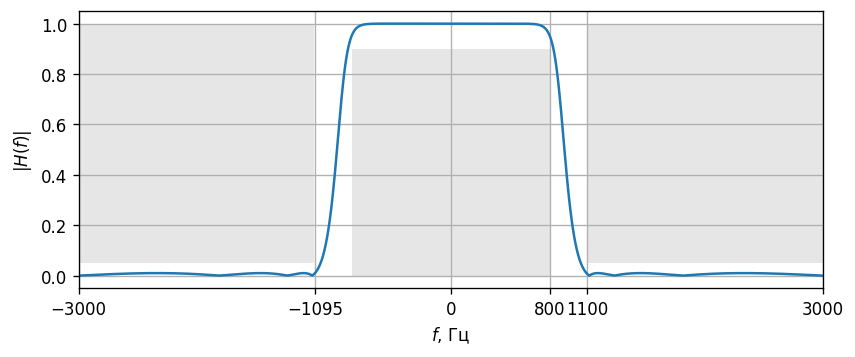

In [17]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

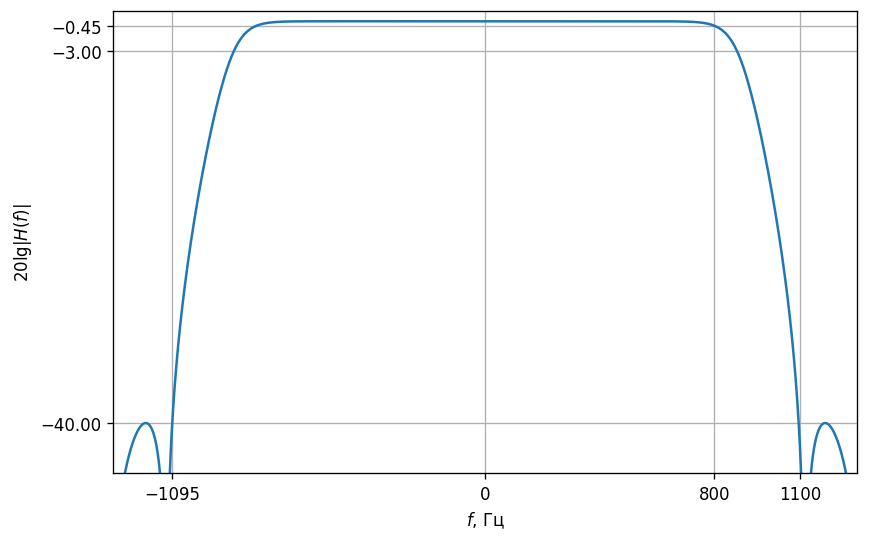

In [23]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-1300, 1300])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [24]:
signal.tf2sos(beta, alpha)

array([[ 0.02992934,  0.02259232,  0.02992934,  1.        , -0.12588832,
         0.        ],
       [ 1.        ,  1.        ,  0.        ,  1.        , -0.4090666 ,
         0.14544573],
       [ 1.        , -0.37897615,  1.        ,  1.        , -0.74191542,
         0.43965815],
       [ 1.        , -0.78123826,  1.        ,  1.        , -1.06670468,
         0.79209273]])

Синтез на основе фильтра Золотарева - Кауэра

In [33]:
N, Wn = signal.ellipord(wp=wp, ws=ws, gpass=gpass, gstop=gstop, analog=False, fs=fs)
beta, alpha = signal.ellip(N=N, rp=gpass, rs=gstop, Wn=Wn, btype='low', analog=False, output='ba', fs=fs)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)

In [34]:
signal.tf2sos(beta, alpha)

array([[ 0.02484758,  0.02484758,  0.        ,  1.        , -0.6453319 ,
         0.        ],
       [ 1.        , -0.33189444,  1.        ,  1.        , -1.2609773 ,
         0.63254003],
       [ 1.        , -0.96984403,  1.        ,  1.        , -1.25515377,
         0.90317071]])

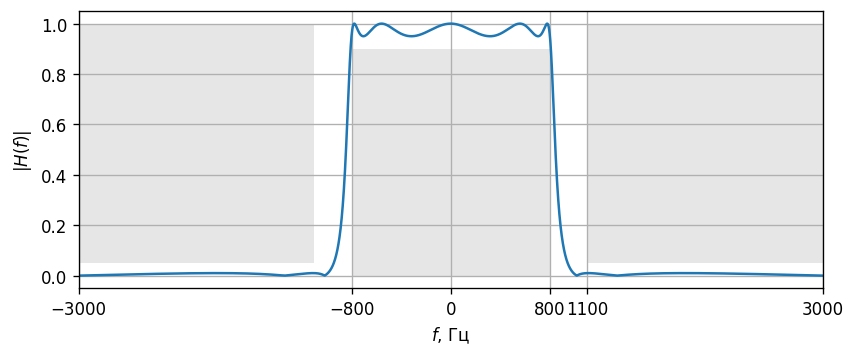

In [27]:
plt.figure(figsize=[8, 3], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, (abs(H)))
plt.xlim([-fs/2, fs/2])
plt.xticks([-fs/2, -Wn, 0, wp, ws, fs/2])
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.grid()
plt.fill([-wp,-wp, wp, wp], [0, 0.9, 0.9, 0], '0.9', lw=0)
plt.fill([-fs,-fs, -ws, -ws], [0.05, 1, 1, 0.05], '0.9', lw=0)
plt.fill([fs,fs, ws, ws], [0.05, 1, 1, 0.05], '0.9', lw=0)

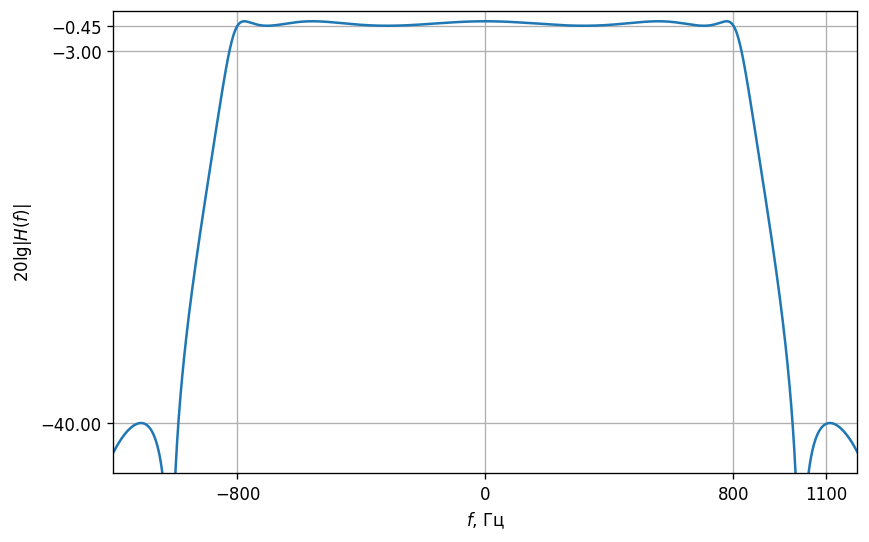

In [32]:
plt.figure(figsize=[8, 5], dpi=120)
f, H = signal.freqz(beta, alpha, worN=np.linspace(-fs/2, fs/2, 1024**2), fs=fs)
plt.plot(f, 20*np.log10(abs(H)))
plt.xticks([-Wn, 0, wp, ws])
plt.yticks([-gstop, -3, -gpass])
plt.xlim([-1200, 1200])
plt.ylim([-45, 1])
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg|H(f)|$")
plt.grid()

In [38]:
signal.tf2sos(beta, alpha)

array([[ 0.02484758,  0.02484758,  0.        ,  1.        , -0.6453319 ,
         0.        ],
       [ 1.        , -0.33189444,  1.        ,  1.        , -1.2609773 ,
         0.63254003],
       [ 1.        , -0.96984403,  1.        ,  1.        , -1.25515377,
         0.90317071]])

Выбираем фильтр с наименьшим порядком: фильтр Золотарёва - Кауэра (4 порядка).

In [39]:
beta, alpha

(array([ 0.02484758, -0.00749747,  0.0253482 ,  0.0253482 , -0.00749747,
         0.02484758]),
 array([ 1.        , -3.16146297,  4.74217079, -3.94523587,  1.81859737,
        -0.36867272]))

$\begin{align}
  & H(z)=\frac{0,0248+0,0.0248{{z}^{-1}}+{{z}^{-3}}}{1-0,5772{{z}^{-1}}+0,4218{{z}^{-2}}-0,0563{{z}^{-3}}}= \\ 
 & =0,0985\frac{1+{{z}^{-1}}}{1-0,1584{{z}^{-1}}}\cdot \frac{1+2{{z}^{-1}}+{{z}^{-2}}}{1-0,4188{{z}^{-1}}+0,3554{{z}^{-2}}}. \\ 
\end{align}$ 

### Задача 2.2 Синтез аналога двухкаскадного RC-фильтра (I способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом билинейного *z*-преобразования.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

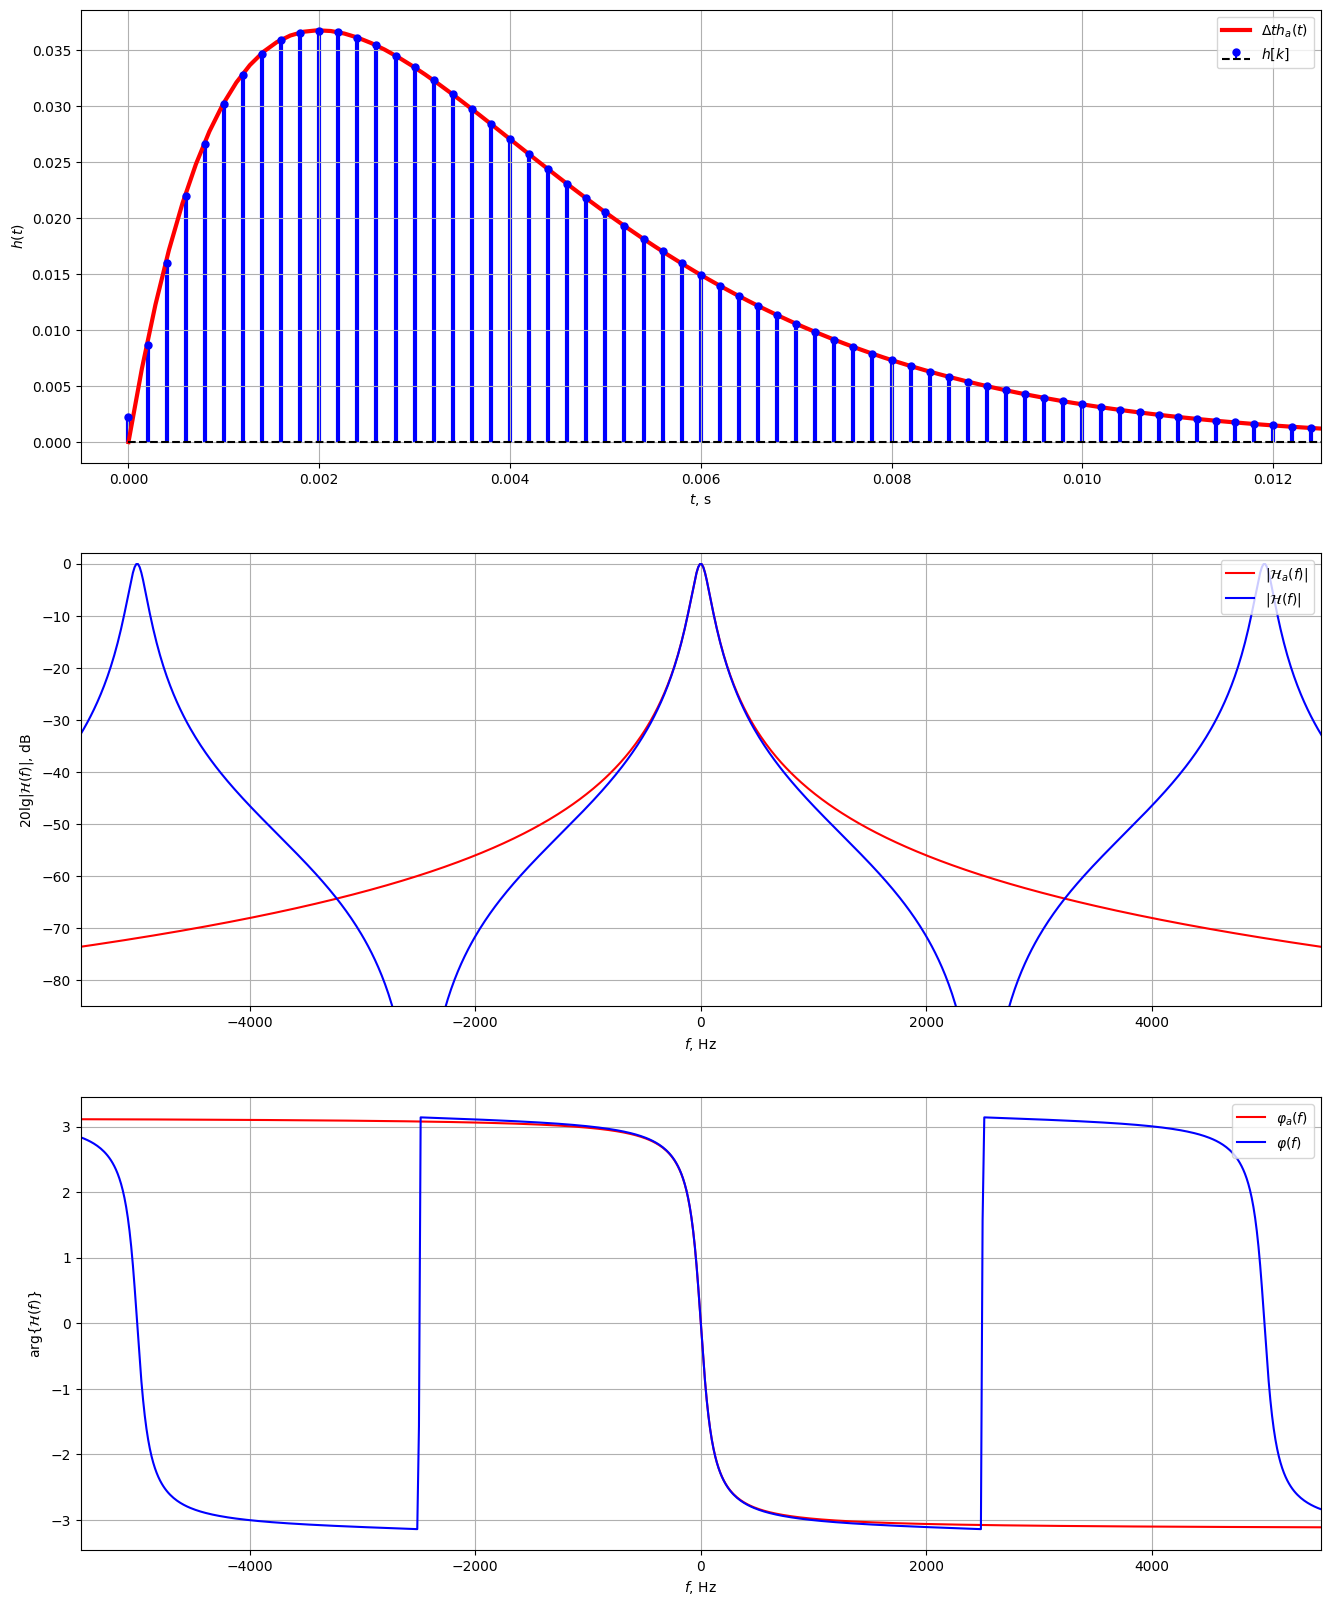

In [44]:
RC = 2*1e-3
dt = RC/10

LTI = signal.lti(
    [1],
    [RC**2, 2*RC, 1]
)

DLTI = signal.dlti(
    [1, 2, 1],
    [(2*RC/dt + 1)**2, (2 - 8*(RC/dt)**2), (2*RC/dt - 1)**2],
    dt=dt
)

plt.figure(figsize=(16,20))

plt.subplot(311)
t, h_a = signal.impulse(LTI)
plt.plot(t, h_a*dt, 'r', lw=3, label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(DLTI, n=100)
ml, sl, bl = plt.stem(t, np.squeeze(h), 'b', basefmt = 'k--', markerfmt = 'bo', label="$h[k]$")
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 5)

plt.grid()
plt.xlim([-0.0005, 0.0125])
plt.xlabel("$t$, s")
plt.ylabel("$h(t)$")
plt.legend(loc = 'upper right')

plt.subplot(312)

w_a, H_a = signal.freqresp(LTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000)/dt)
theta_d, H_d = signal.dfreqresp(DLTI, w=np.linspace(-3*np.pi, 3*np.pi, 1000))

plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "r", label="$|\mathcal{H}_a(f)|$")
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), "b", label="$|\mathcal{H}(f)|$")
plt.ylabel("$20 \lg |\mathcal{H}(f)|$, dB")
plt.xlabel("$f$, Hz")
plt.ylim(-85, 2)
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()

plt.subplot(313)

plt.plot(w_a/(2*np.pi), np.angle(H_a), "r", label="$\\varphi_a(f)$")
plt.plot(theta_d/(2*np.pi*dt), np.angle(H_d), "b", label="$\\varphi(f)$")
plt.ylabel("arg$\{\mathcal{H}(f)\}$")
plt.xlabel("$f$, Hz")
plt.xlim(-1.1/dt, +1.1/dt)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()

## Модуль 3. Метод инвариантной импульсной характеристики.

### Задача 3.1 Синтез аналога двухкаскадного RC-фильтра (II способ)

Построить БИХ фильтр, эквивалентный двум последовательно соединенным RC-цепочкам интегрирующего типа (соединённым через развязывающий усилитель), воспользовавшись методом инвариантной импульсной характеристики.

Параметры $RC$ и $\Delta t $ выбрать самостоятельно. 
Сравнить частотные и импульсные характеристики  цифровых фильтров и их аналоговых прототипов. 

### Задача 3.2 Цифровая фильтрация реальных сигналов (творческая задача)

Выполнить фильтрацию `.wav` файла с помощью одного из цифровых фильтров, рассмотренных в первой и второй лабораторной работах. Проиллюстрировать, как в результате фильтрации изменился сигнал. Привести пример, для чего выбранный фильтр может быть применен. 

Для этой задачи `.wav` файл можно загрузить, например, с сайта [freesound.org](https://freesound.org/) или взять из предыдущих лабораторных работ.